In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from os import getcwd
from tensorflow.keras import regularizers
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tokenizer = Tokenizer()
path_sonnets = '/content/drive/MyDrive/TF AND KERAS/Deeplearning.AI TensorFlow Developer Professional Certificate/Natural Language Processing/sonnet.txt'
data = open(path_sonnets).read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len-1))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 128)           411008    
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 64)            49408     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              1647243   
Total params: 2,173,963
Trainable params: 2,173,963
Non-trainable params: 0
____________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=50, batch_size=128, verbose=1)

Train on 15462 samples
Epoch 1/50
15462/15462 [==============================] - 19s 1ms/sample - loss: 7.0051 - accuracy: 0.0193
Epoch 2/50
15462/15462 [==============================] - 8s 518us/sample - loss: 6.5995 - accuracy: 0.0224
Epoch 3/50
15462/15462 [==============================] - 8s 516us/sample - loss: 6.5498 - accuracy: 0.0223
Epoch 4/50
15462/15462 [==============================] - 8s 537us/sample - loss: 6.4804 - accuracy: 0.0214
Epoch 5/50
15462/15462 [==============================] - 11s 686us/sample - loss: 6.4081 - accuracy: 0.0249
Epoch 6/50
15462/15462 [==============================] - 13s 834us/sample - loss: 6.2852 - accuracy: 0.0340
Epoch 7/50
15462/15462 [==============================] - 11s 724us/sample - loss: 6.1501 - accuracy: 0.0354
Epoch 8/50
15462/15462 [==============================] - 9s 595us/sample - loss: 6.0167 - accuracy: 0.0391
Epoch 9/50
15462/15462 [==============================] - 10s 660us/sample - loss: 5.8869 - accuracy: 0.0415
Ep

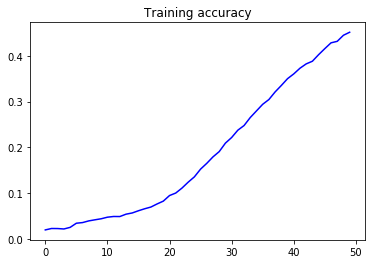

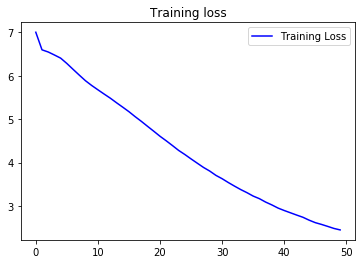

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list),axis=1)
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope in thine eyes hath hate ' lost so am it more true more more more more more more more more more more cheeks and cheeks and cheeks cheeks cheeks ' ' more more more more more more more more more and be cheeks still still still old fair more more more more and more more rare cheeks cheeks cheeks cheeks cheeks hate ' hate more more more more say more more more more fair fair grave cheeks rare rare rare cheeks hate ' ' more more dumb say not not be free her stand ' ' more more more more
